# Brazilian Senators Facial Recognition 
Fernando Melo  
30/10/2018  

**Objective:**
Create an image classification model to recognize the faces of the 2017 Brazilian senators. The dataset has a total of 10,000 public images of 80 senators. Each image has only one senator on it and the photos were cropped to get only their faces as shown below. The classes are unbalanced because some senators have more photos than others. For example, senator Aécio_Neves has 325 pictures while senator Maria_do_Carmo got only 24. For the training phase I used 8,000 images and separated 2,000 images for the validation.  

Deep learning  using Resnet34 , Pytorch 1.0 and Fastai v1.  
(This code is based on Fastai DL1(v3) lesson 1 notebook)

In [2]:
%reload_ext autoreload
%autoreload 2

from fastai import *
from fastai.vision import *
from pathlib import Path

## Load data

In [3]:
path = Path('/home/jupyter/tutorials/data/senadorespronta')
path

PosixPath('/home/jupyter/tutorials/data/senadorespronta')

## Data preparation and exploration

In [4]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

In [5]:
print(data.classes)
print('Total of senators:', len(data.classes))

['Acir_Gurgacz', 'Aecio_Neves', 'Aloysio_Nunes_Ferreira', 'Alvaro_Dias', 'Ana_Amelia', 'Angela_Portela', 'Antonio_Anastasia', 'Antonio_Carlos_Valadares', 'Armando_Monteiro', 'Ataides_Oliveira', 'Benedito_de_Lira', 'Blairo_Maggi', 'Cassio_Cunha_Lima', 'Cidinho_Santos', 'Ciro_Nogueira', 'Cristovam_Buarque', 'Dalirio_Beber', 'Dario_Berger', 'Davi_Alcolumbre', 'Edison_Lobao', 'Eduardo_Amorim', 'Eduardo_Braga', 'Elmano_Ferrer', 'Eunicio_Oliveira', 'Fatima_Bezerra', 'Fernando_Bezerra_Coelho', 'Fernando_Collor', 'Flexa_Ribeiro', 'Garibaldi_Alves_Filho', 'Gladson_Cameli', 'Gleisi_Hoffmann', 'Helio_Jose', 'Humberto_Costa', 'Ivo_Cassol', 'Jader_Barbalho', 'Joao_Alberto_Souza', 'Joao_Capiberibe', 'Jorge_Viana', 'Jose_Agripino', 'Jose_Anibal', 'Jose_Maranhao', 'Jose_Medeiros', 'Jose_Pimentel', 'Katia_Abreu', 'Lasier_Martins', 'Lidice_da_Mata', 'Lindbergh_Farias', 'Lucia_Vania', 'Magno_Malta', 'Maria_do_Carmo_Alves', 'Marta_Suplicy', 'Omar_Aziz', 'Otto_Alencar', 'Paulo_Bauer', 'Paulo_Paim', 'Paulo_

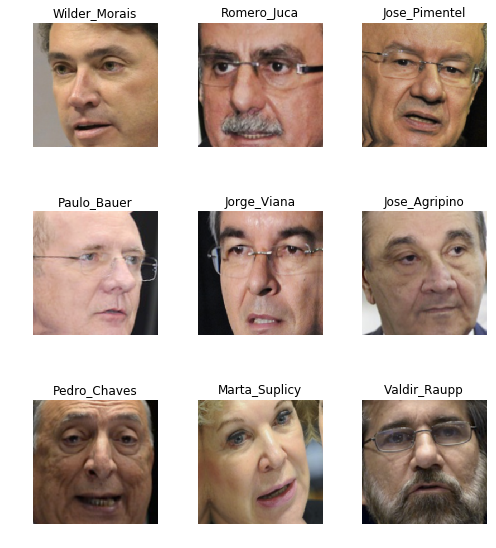

In [6]:
data.show_batch(rows=3, figsize=(7,8))

In [7]:
print('Train size:', len(data.train_ds))
print('Valid size:', len(data.valid_ds))

Train size: 8024
Valid size: 2039


## Fit the model

In [8]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(1)

Total time: 00:41
epoch  train_loss  valid_loss  accuracy
1      1.907520    1.088059    0.765571  (00:41)



In [9]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(1e-5,3e-4), pct_start=0.05)

Total time: 05:12
epoch  train_loss  valid_loss  accuracy
1      0.791665    0.346317    0.939186  (00:52)
2      0.342532    0.148233    0.974007  (00:52)
3      0.172553    0.078803    0.988230  (00:51)
4      0.106683    0.053537    0.992643  (00:51)
5      0.080187    0.047085    0.993134  (00:52)
6      0.063759    0.045657    0.992643  (00:51)



In [10]:
interp = ClassificationInterpretation.from_learner(learn)

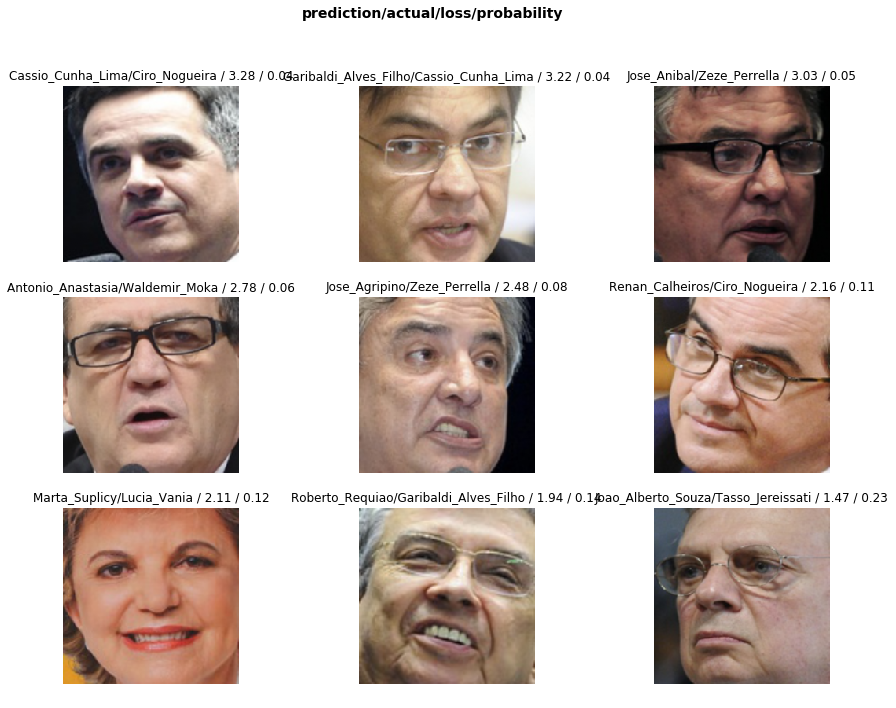

In [11]:
interp.plot_top_losses(9, figsize=(15,11))

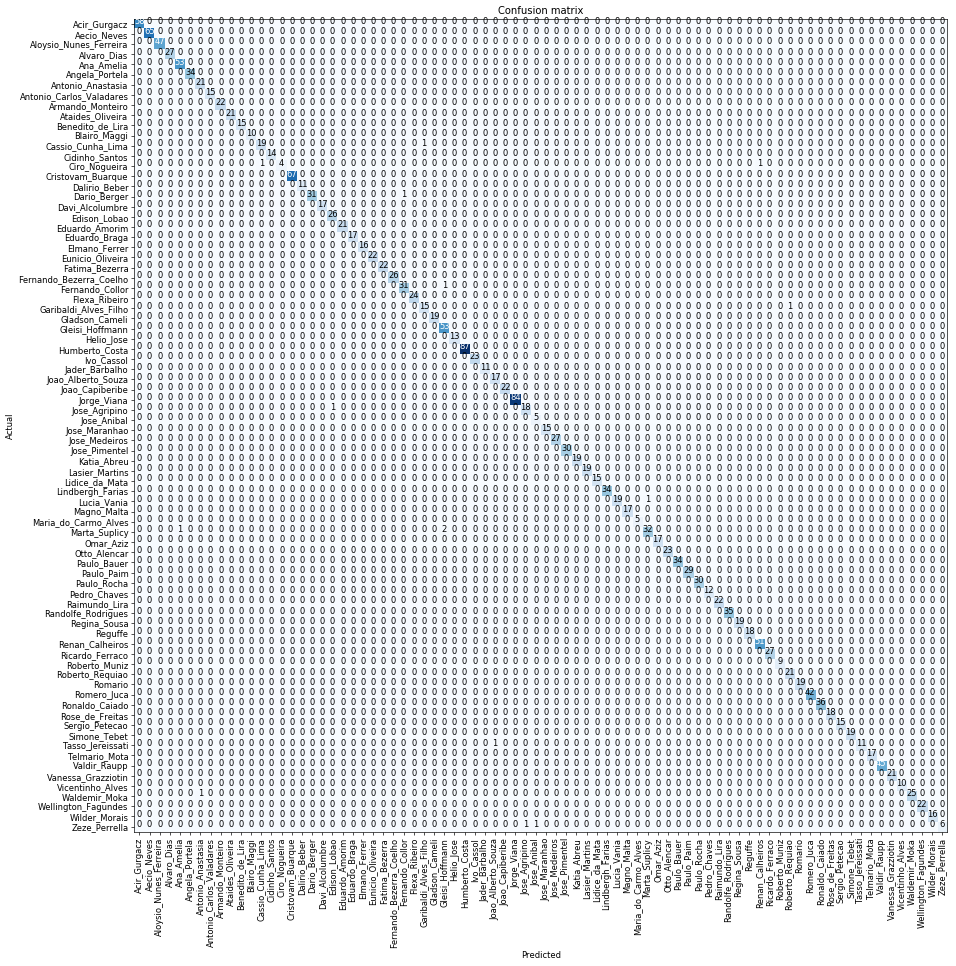

In [12]:
interp.plot_confusion_matrix(figsize=(16,16), dpi=60)

In [13]:
interp.most_confused(min_val=0)

[('Marta_Suplicy', 'Gleisi_Hoffmann', 2),
 ('Cassio_Cunha_Lima', 'Garibaldi_Alves_Filho', 1),
 ('Ciro_Nogueira', 'Cassio_Cunha_Lima', 1),
 ('Ciro_Nogueira', 'Renan_Calheiros', 1),
 ('Dario_Berger', 'Fernando_Collor', 1),
 ('Fernando_Collor', 'Gleisi_Hoffmann', 1),
 ('Garibaldi_Alves_Filho', 'Roberto_Requiao', 1),
 ('Jose_Agripino', 'Edison_Lobao', 1),
 ('Lucia_Vania', 'Marta_Suplicy', 1),
 ('Marta_Suplicy', 'Ana_Amelia', 1),
 ('Tasso_Jereissati', 'Joao_Alberto_Souza', 1),
 ('Waldemir_Moka', 'Antonio_Anastasia', 1),
 ('Zeze_Perrella', 'Jose_Agripino', 1),
 ('Zeze_Perrella', 'Jose_Anibal', 1)]

In [14]:
learn.save('sen_rn34')

## Testing model for production

Now , we're gonna download a completely different image from google and use the trained model to make a new prediction.

In [16]:
# fastai.defaults.device = torch.device('cpu')

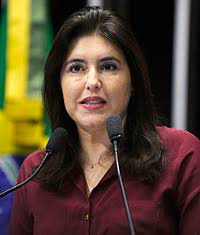

In [27]:
#img = open_image(path/'fromgoogle'/'8113504_300x300.jpg')
img = open_image(path/'fromgoogle'/'simone.jpg')
#img = open_image(path/'fromgoogle'/'Magno-Malta.png')
img

In [28]:
classes = ['Acir_Gurgacz', 'Aecio_Neves', 'Aloysio_Nunes_Ferreira', 'Alvaro_Dias', 'Ana_Amelia', 'Angela_Portela', 
           'Antonio_Anastasia', 'Antonio_Carlos_Valadares', 'Armando_Monteiro', 'Ataides_Oliveira', 'Benedito_de_Lira', 
           'Blairo_Maggi', 'Cassio_Cunha_Lima', 'Cidinho_Santos', 'Ciro_Nogueira', 'Cristovam_Buarque', 'Dalirio_Beber', 
           'Dario_Berger', 'Davi_Alcolumbre', 'Edison_Lobao', 'Eduardo_Amorim', 'Eduardo_Braga', 'Elmano_Ferrer', 
           'Eunicio_Oliveira', 'Fatima_Bezerra', 'Fernando_Bezerra_Coelho', 'Fernando_Collor', 'Flexa_Ribeiro', 
           'Garibaldi_Alves_Filho', 'Gladson_Cameli', 'Gleisi_Hoffmann', 'Helio_Jose', 'Humberto_Costa', 'Ivo_Cassol', 
           'Jader_Barbalho', 'Joao_Alberto_Souza', 'Joao_Capiberibe', 'Jorge_Viana', 'Jose_Agripino', 'Jose_Anibal', 
           'Jose_Maranhao', 'Jose_Medeiros', 'Jose_Pimentel', 'Katia_Abreu', 'Lasier_Martins', 'Lidice_da_Mata', 
           'Lindbergh_Farias', 'Lucia_Vania', 'Magno_Malta', 'Maria_do_Carmo_Alves', 'Marta_Suplicy', 'Omar_Aziz', 
           'Otto_Alencar', 'Paulo_Bauer', 'Paulo_Paim', 'Paulo_Rocha', 'Pedro_Chaves', 'Raimundo_Lira', 'Randolfe_Rodrigues', 
           'Regina_Sousa', 'Reguffe', 'Renan_Calheiros', 'Ricardo_Ferraco', 'Roberto_Muniz', 'Roberto_Requiao', 'Romario', 
           'Romero_Juca', 'Ronaldo_Caiado', 'Rose_de_Freitas', 'Sergio_Petecao', 'Simone_Tebet', 'Tasso_Jereissati', 
           'Telmario_Mota', 'Valdir_Raupp', 'Vanessa_Grazziotin', 'Vicentinho_Alves', 'Waldemir_Moka', 'Wellington_Fagundes', 
           'Wilder_Morais', 'Zeze_Perrella']
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('sen_rn34')

In [29]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

'Simone_Tebet'

## END